In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/lendingclub.csv')

In [10]:
df.head()

,home_ownership,income,dti,fico,loan_status
0,1,43.0,39.66,670,0
1,1,80.0,39.54,685,1
2,0,30.0,39.52,695,1
3,1,105.0,39.45,710,0
4,0,28.6,39.28,680,1


In [11]:
df.dtypes

,0
home_ownership,int64
income,float64
dti,float64
fico,int64
loan_status,int64


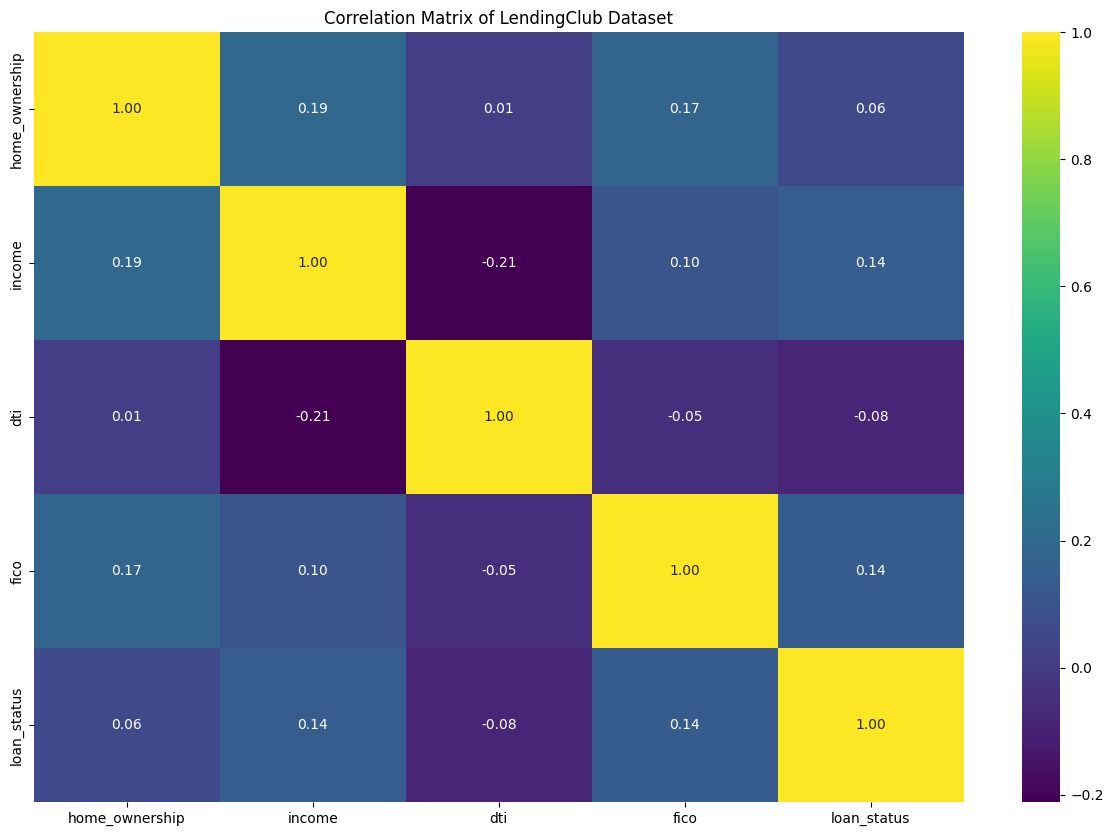

In [12]:
# prompt: create a correlation amtrix of all the variables

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of LendingClub Dataset')
plt.show()

Most of the variable relationships appear logical. For example, individuals with more debt tend to have lower credit scores, and theres a positive relationship between FICO scores and income. A higher credit score is also associated with a higher likelihood of homeownership, a lower DTI ratio, and a greater likelihood of having a loan, which aligns with expectations. Additionally, the positive relationship between homeownership and income makes sense. Overall, the observed relationships generally match expected patterns. One variable relationship that could be interesting to explore further is the link between income and loan status. Income also has the highest correlation among variables in regards to loan status.

In [13]:

df['loan_status'] = pd.Categorical(df['loan_status'])
df.dtypes


,0
home_ownership,int64
income,float64
dti,float64
fico,int64
loan_status,category


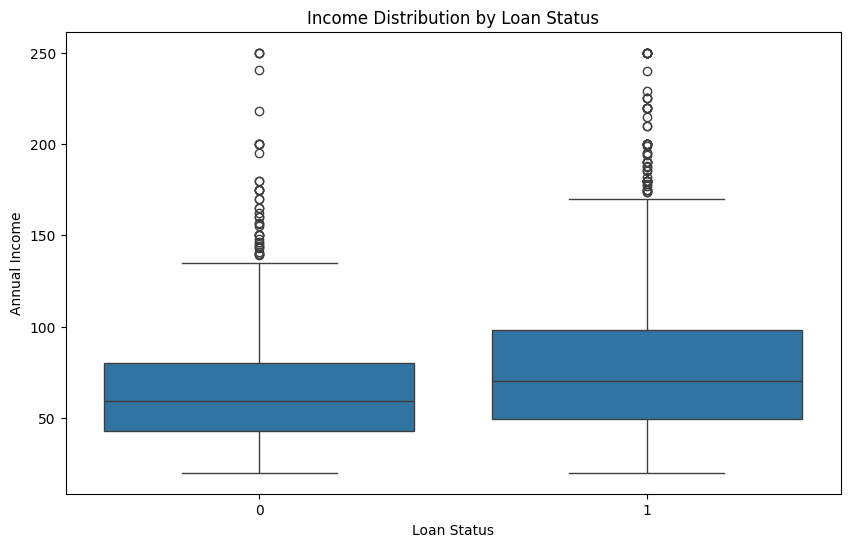

In [15]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='income', data=df)
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

In [16]:
df["income"].describe()

,income
count,2270.000000
mean,74.058571
std,39.335066
min,20.000000
25%,46.000000
50%,65.000000
75%,92.000000
max,250.000000


income_group    loan_status
Low             1              0.563830
                0              0.436170
Medium          1              0.654657
                0              0.345343
High            1              0.747801
                0              0.252199
Very High       1              0.783505
                0              0.216495
Extremely High  1              0.750000
                0              0.250000
Name: proportion, dtype: float64


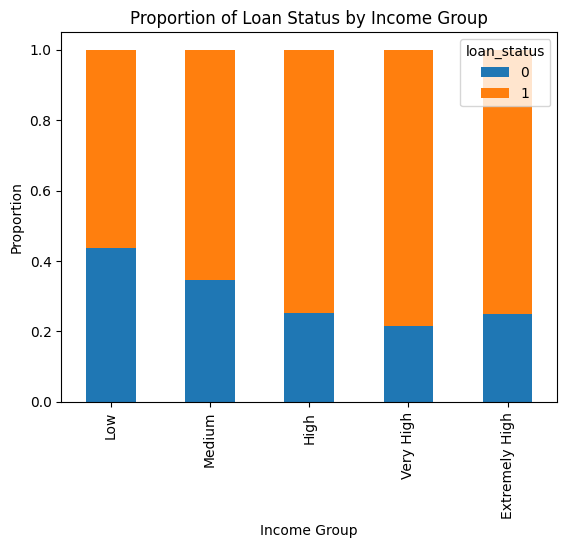

In [23]:

# Discretize income into groups
income_bins = [0, 50, 100, 150, 200, float('inf')]
income_labels = ['Low', 'Medium', 'High', 'Very High', "Extremely High"]
df['income_group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)

# Calculate the proportion of loan takers in each income group
loan_proportion = df.groupby('income_group')['loan_status'].value_counts(normalize=True)

print(loan_proportion)

# Visualization (optional)
loan_proportion.unstack().plot(kind='bar', stacked=True)
plt.title('Proportion of Loan Status by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Proportion')
plt.show()

The graph above suggest that while lower income individuals are more likely to hold loans due to limited financial resources, high income earners also display an increased likelihood of having loans. This trend may reflect the fact that high earners, who are typically business owners or investors, actively take on debt as a strategic financial tool to expand their wealth. For higher earners, loans can be a way to leverage capital for business expansion, investments, or large-scale projects that generate additional income. Unlike lower-income individuals who may rely on loans out of necessity, high earners likely view debt as an investment in future growth, indicating a positive, intentional use of debt to increase financial opportunities.







